In [48]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web 
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


from sklearn import svm, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_validate, train_test_split

In [5]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'id' : 'constituents'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.find('td').text.strip()
        if "." in ticker:
            ticker = ticker.replace('.','-')
            print('ticker replaced to', ticker) 
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
        
    print(tickers)
    
    return tickers

save_sp500_tickers()

ticker replaced to BRK-B
ticker replaced to BF-B
['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK-B', 'BBY', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA

In [8]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open ("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    
    if not os.path.exists('stocks_dfs2'):
        os.makedirs('stock_dfs2')
        
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2020,3,31)
    
    for ticker in tickers[415:]:
        print(ticker)
        if not os.path.exists('stock_dfs2/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_dfs2/{}.csv'.format(ticker))
    else:
        print('Already have {}'.format(ticker))
        
get_data_from_yahoo()

SEE
SRE
NOW
SHW
SPG
SWKS
SLG
SNA
SO
LUV
SWK
SBUX
STT
STE
SYK
SIVB
SYF
SNPS
SYY
TMUS
TROW
TTWO
TPR
TGT
TEL
FTI
TFX
TXN
TXT
TMO
TIF
TJX
TSCO
TT
TDG
TRV
TFC
TWTR
TSN
UDR
ULTA
USB
UAA
UA
UNP
UAL
UNH
UPS
URI
UHS
UNM
VFC
VLO
VAR
VTR
VRSN
VRSK
VZ
VRTX
VIAC
V
VNO
VMC
WRB
WAB
WMT
WBA
DIS
WM
WAT
WEC
WFC
WELL
WDC
WU
WRK
WY
WHR
WMB
WLTW
WYNN
XEL
XRX
XLNX
XYL
YUM
ZBRA
ZBH
ZION
ZTS
Already have ZTS


In [2]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
        
    main_data = pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        data = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        data.set_index('Date', inplace=True)
        
        data.rename(columns = {'Adj Close': ticker}, inplace=True)
        data.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
        
        if main_data.empty:
            main_data = data
        else:
            main_data = main_data.join(data, how='outer')
            
        if count % 10 == 0:
            print(count)
            
    print(main_data.head())
    main_data.to_csv('sp500_joined_closes.csv')
    
compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.346825  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  25.299936  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  26.032759  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  28.126556  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  28.684900  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  WYNN       XEL        XRX       XLNX  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.296314  ...   NaN  7.782174  51.922791  33.437664   
2000-01-04  14.625  NaN 

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.905139  0.887716  0.829516  0.934925  0.943979  0.836296   
ABT   0.905139  1.000000  0.799376  0.842103  0.983696  0.896826  0.949351   
ABBV  0.887716  0.799376  1.000000  0.861629  0.867423  0.907269  0.857230   
ABMD  0.829516  0.842103  0.861629  1.000000  0.868016  0.897995  0.901565   
ACN   0.934925  0.983696  0.867423  0.868016  1.000000  0.935657  0.950600   

           AMD       AAP       AES  ...      WYNN       XEL       XRX  \
MMM   0.006341  0.881000 -0.166736  ...  0.750438  0.918172  0.065733   
ABT   0.186603  0.848150 -0.060896  ...  0.699725  0.977549  0.070652   
ABBV  0.682912  0.267278  0.510116  ...  0.194388  0.792614  0.434737   
ABMD  0.279082  0.679891  0.036435  ...  0.534898  0.825233  0.080947   
ACN   0.332332  0.857949  0.326336  ...  0.697807  0.987607  0.156458   

          XLNX       XYL       YUM      ZBRA       ZBH      ZION       ZTS  
MMM   0.775071 

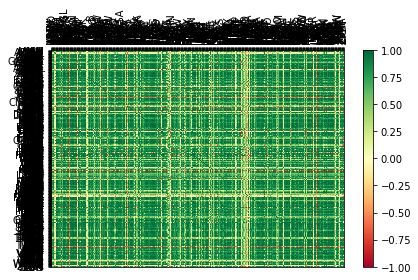

In [3]:
def visualize_data():
    data = pd.read_csv('sp500_joined_closes.csv')
    #data['AAPL'].plot()
    #plt.show()
    data_corr = data.corr()
    
    print(data_corr.head())
    
    data = data_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels  = data_corr.columns
    row_labels = data_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()

    
visualize_data()

In [41]:
def process_data_for_labels(ticker):
    hm_days = 7
    data = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = data.columns.values.tolist()
    data.fillna(0, inplace=True)
    
    for i in range(1, hm_days+1):
        data['{}_{}d'.format(ticker, i)] = (data[ticker].shift(-i) - data[ticker]) / data[ticker]
    
    data.fillna(0, inplace=True)
    return tickers, data

In [42]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02  # 2% change in share price
    
    # If price goes up 2% ...
    for col in cols:
        if col > requirement:
            return 1  # Buy
        if col < -requirement:
            return -1  # Sell
    return 0  # Hold 

In [43]:
def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)
    
    # Create new column of classes: buy/ sell/ hold 
    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                              df['{}_1d'.format(ticker)],
                                              df['{}_2d'.format(ticker)],
                                              df['{}_3d'.format(ticker)],
                                              df['{}_4d'.format(ticker)],
                                              df['{}_5d'.format(ticker)],
                                              df['{}_6d'.format(ticker)],
                                              df['{}_7d'.format(ticker)],
                                             ))
    
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))
    
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    X = df_vals.values  # Features
    y = df['{}_target'.format(ticker)].values  # Target labels
    
    return X, y, df

In [44]:
extract_featuresets('MMM')

Data spread: Counter({'1': 1984, '-1': 1597, '0': 1512})


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.0397349 , -0.0285716 ,  0.        , ...,  0.        ,
         -0.04842358,  0.        ],
        [ 0.02896539, -0.00183788,  0.        , ...,  0.        ,
         -0.00118339,  0.        ],
        ...,
        [-0.02158898, -0.0164886 , -0.01571185, ..., -0.05860185,
          0.0076726 , -0.05207368],
        [ 0.03377364,  0.06410946,  0.03536535, ...,  0.03518007,
         -0.00217547,  0.04392958],
        [-0.00892995, -0.00541965,  0.01262641, ...,  0.02849006,
         -0.02761629,  0.00865616]]),
 array([-1,  1,  1, ...,  1,  0,  0], dtype=int64),
                    MMM        ABT       ABBV        ABMD         ACN  \
 Date                                                                   
 2000-01-03   26.346825   6.564564   0.000000   18.250000    0.000000   
 2000-01-04   25.299936   6.377004   0.000000   17.812500    0.000000   
 2000-01-05   26.032759   6.3

In [51]:
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)  # Extract features
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)  
    confidence = clf.score(X_test, y_test)
    print('Accuracy', confidence)
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))
    
    return confidence

In [52]:
do_ml('AAPL')

Data spread: Counter({'1': 2524, '-1': 2068, '0': 501})
Accuracy 0.45839874411302983
Predicted spread: Counter({1: 757, -1: 445, 0: 72})


0.45839874411302983

In [53]:
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)  # Extract features
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Instantiate ensemble model
    clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                           ('knn', neighbors.KNeighborsClassifier()),
                           ('rfor', RandomForestClassifier())])
    
    clf.fit(X_train, y_train)  
    confidence = clf.score(X_test, y_test)
    print('Accuracy', confidence)
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))
    
    return confidence

In [54]:
do_ml('AAPL')

Data spread: Counter({'1': 2524, '-1': 2068, '0': 501})


c:\users\greg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\greg\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy 0.4631083202511774
Predicted spread: Counter({1: 794, -1: 473, 0: 7})


0.4631083202511774